/home/bishoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


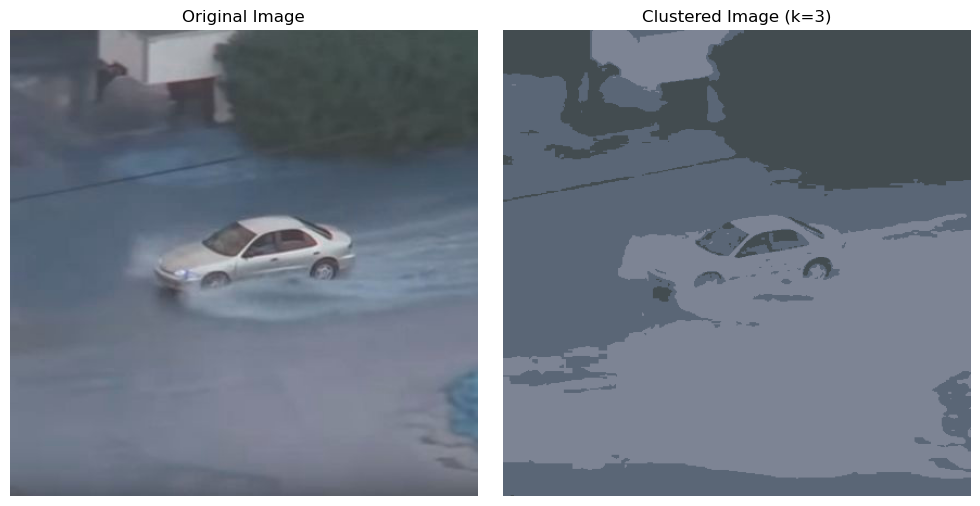

In [32]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = '/home/bishoy/Fourth Year/Second Semester/Satellite Imagery/SI_Project/datasetResNet/train/flooded/116.jpg'
image = Image.open(image_path)

# Preprocess the image
# resized_image = image.resize((100, 100))  # Resize the image to a desired size
image_data = np.array(image)  # Convert the image to a NumPy array

# Flatten the image
num_pixels = image_data.shape[0] * image_data.shape[1]
flattened_image_data = image_data.reshape(num_pixels, -1)

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(flattened_image_data)
cluster_labels = kmeans.predict(flattened_image_data)
cluster_centers = kmeans.cluster_centers_

# Replace each pixel with its corresponding cluster centroid
clustered_image_data = np.zeros_like(flattened_image_data)
for i in range(k):
    clustered_image_data[cluster_labels == i] = cluster_centers[i]

# Reshape the flattened image back to its original shape
clustered_image = clustered_image_data.reshape(image_data.shape)

# Display the original and clustered images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(clustered_image.astype(np.uint8))
ax[1].set_title('Clustered Image (k={})'.format(k))
ax[1].axis('off')

plt.tight_layout()
plt.show()


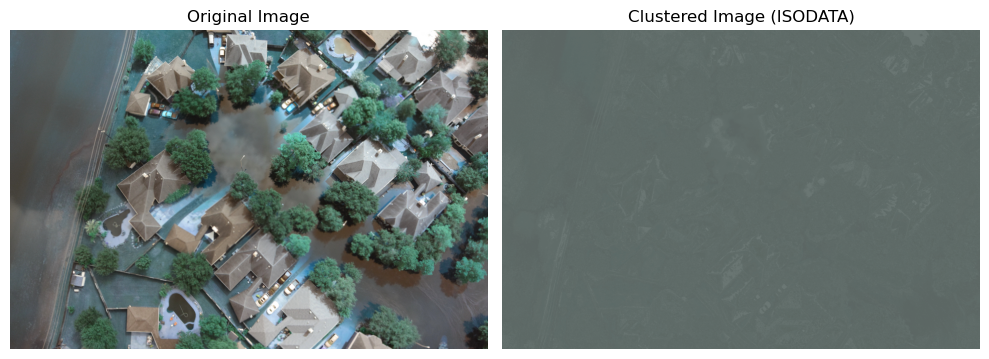

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = '/home/bishoy/Fourth Year/Second Semester/Satellite Imagery/SI_Project/datasetResNet/train/flooded/1.jpg'
image = Image.open(image_path)

# Preprocess the image
# resized_image = image.resize((100, 100))  # Resize the image to a desired size
image_data = np.array(image)  # Convert the image to a NumPy array

# Flatten the image
num_pixels = image_data.shape[0] * image_data.shape[1]
flattened_image_data = image_data.reshape(num_pixels, -1)

# ISODATA Clustering
num_clusters = 10
min_cluster_size = 10  # Minimum number of pixels in a cluster
max_cluster_size = 1000  # Maximum number of pixels in a cluster
max_iterations = 20  # Maximum number of iterations

# Initial cluster centroids
initial_centroids = np.random.choice(
    num_pixels, size=num_clusters, replace=False)
centroids = flattened_image_data[initial_centroids]

iteration = 0
while iteration < max_iterations:
    # Assign each pixel to its nearest centroid
    distances = np.sqrt(
        ((flattened_image_data[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=1)

    # Update cluster centroids
    new_centroids = np.zeros_like(centroids)
    for i in range(num_clusters):
        cluster_pixels = flattened_image_data[cluster_labels == i]
        if len(cluster_pixels) < min_cluster_size:
            continue
        elif len(cluster_pixels) > max_cluster_size:
            cluster_pixels = cluster_pixels[np.random.choice(
                len(cluster_pixels), size=max_cluster_size, replace=False)]
        new_centroids[i] = np.mean(cluster_pixels, axis=0)

    # Check convergence
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids
    iteration += 1

# Replace each pixel with its corresponding cluster centroid
clustered_image_data = np.zeros_like(flattened_image_data)
for i in range(num_clusters):
    clustered_image_data[cluster_labels == i] = centroids[i]

# Reshape the flattened image back to its original shape
clustered_image = clustered_image_data.reshape(image_data.shape)

# Display the original and clustered images

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(clustered_image.astype(np.uint8))
ax[1].set_title('Clustered Image (ISODATA)')
ax[1].axis('off')

plt.tight_layout()
plt.show()
